# AIF

# GOLD SILVER Predicting

## INDEX <a class="anchor" id="index"></a>

* [Libraries ](#libraries)

* [Class Transforms Data](#class)

* [Get Data](#get_date)

* [Transform Data](#transform)

    * [Transform Empty Records](#empty)

    * [Remove Weekends](#weekends)

    * [Normalize Values](#normalize)
    
    * [Enflation Effect](#inflate)
    
    * [Get Ratio of All Values To Each Other](#ratio)    
    
    * [Mooving Avarage](#mooving)        
    
    * [Kaufman (KAMA)](#kaufman)
    
    * [RSI](#rsi)
    
    * [Intersections](#intersection)
    
    * [Historical Returns](#returns)    

* [Class Genetic Algorithm](#geneticC)

* [Use Genetic Algorithm](#useG)

## Libraries <a class="anchor" id="libraries"></a>
[INDEX](#index)

In [8]:
#Importing Libraries
import pandas as pd
import numpy as np
import pandas_datareader as pdr
#Time
from datetime import datetime, timedelta
from datetime import date
import time
#Graf
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
#Get Data
from yahoofinancials import YahooFinancials
import yfinance as yf
import cpi
import ta
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#ML
from sklearn.metrics import confusion_matrix,classification_report
#from pycaret.classification import *
#Save Load Data & Model
import pickle
import random
import sys
import multiprocessing as mp

In [2]:
#Some times cpi gives warning for update
#cpi.update()

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

warnings.filterwarnings("ignore")

## Transform Data Class Definition                 <a class="anchor" id="class"></a>
[INDEX](#index)

In [237]:
from AIF import Aif

# Get Data                 <a class="anchor" id="get_date"></a>
[INDEX](#index)

In [4]:
ticker_detail = pd.read_csv("Ticker_List.csv",delimiter=';')

In [5]:
ticker_detail

,Ticker,Description,Name,Normalize
0,GC=F,Gold,XAUUSD,Y
1,SI=F,Silver,XAGUSD,Y
2,CL=F,Crude Oil,OIL,Y
3,^GSPC,S&P500,SPY,Y
4,^RUT,Russel 2000 Index,Russel,Y
5,ZN=F,10 Yr US T-Note futures,US10Y,NaN
6,ZT=F,2 Yr US T-Note Futures,US2Y,NaN
7,PL=F,Platinum,Platinum,Y
8,HG=F,Copper,Copper,Y
9,DX=F,Dollar Index,DXY,NaN


In [10]:
%%time
start_date = "2000-09-21"
end_date   =  datetime.today() 
show_data  =  0
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])
#-------------------- 
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])
for i,row in tqdm(ticker_detail.iterrows()):
    df_temp = pdr.get_data_yahoo(symbols=row['Ticker'],  start=start_date, end=end_date,interval="d")
    df_temp.columns = [row['Name']+'_'+col_name for col_name in df_temp.columns]
    df_temp['Date1']=df_temp.index.values
    values = values.merge(df_temp,how='left',left_on='Date',right_on='Date1')
    values = values.drop(labels='Date1',axis=1)
values.shape

18it [00:27,  1.52s/it]

CPU times: user 2.09 s, sys: 203 ms, total: 2.29 s
Wall time: 27.5 s


(5547, 109)

In [11]:
values

,Date,XAUUSD_High,XAUUSD_Low,XAUUSD_Open,XAUUSD_Close,XAUUSD_Volume,XAUUSD_Adj Close,XAGUSD_High,XAGUSD_Low,XAGUSD_Open,...,AMD_Open,AMD_Close,AMD_Volume,AMD_Adj Close,NVDA_High,NVDA_Low,NVDA_Open,NVDA_Close,NVDA_Volume,NVDA_Adj Close
0,2000-09-21,270.299988,270.299988,270.299988,270.299988,0.0,270.299988,4.900000,4.870000,4.900000,...,28.250000,23.937500,8839800.0,23.937500,2.955729,2.791667,2.794271,2.892578,34682400.0,2.657153
1,2000-09-22,271.799988,271.799988,271.799988,271.799988,0.0,271.799988,4.910000,4.900000,4.900000,...,24.250000,26.500000,21627000.0,26.500000,2.979167,2.604167,2.606771,2.942708,38726400.0,2.703202
2,2000-09-25,274.100006,274.100006,274.100006,274.100006,0.0,274.100006,4.915000,4.860000,4.900000,...,26.750000,25.937500,12297300.0,25.937500,3.197917,3.010417,3.033854,3.153646,46756800.0,2.896971
3,2000-09-26,273.899994,273.899994,273.899994,273.899994,0.0,273.899994,4.931000,4.930000,4.930000,...,26.000000,24.875000,8801400.0,24.875000,3.265625,3.041667,3.187500,3.229167,33734400.0,2.966346
4,2000-09-27,278.399994,278.399994,278.399994,278.399994,3511.0,278.399994,4.968000,4.910000,4.910000,...,25.062500,24.000000,6909500.0,24.000000,3.557292,3.203125,3.203125,3.406250,67612800.0,3.129017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,2021-12-20,1799.800049,1792.000000,1796.800049,1793.699951,226.0,1793.699951,22.370001,22.275000,22.299999,...,135.970001,135.800003,38195400.0,135.800003,281.440002,271.450012,273.049988,277.190002,46184700.0,277.190002
5543,2021-12-21,1796.500000,1787.900024,1791.400024,1787.900024,575.0,1787.900024,22.740000,22.225000,22.225000,...,138.190002,144.250000,57785200.0,144.250000,291.200012,274.010010,283.739990,290.750000,52438500.0,290.750000
5544,2021-12-22,1805.199951,1785.500000,1786.000000,1801.599976,567.0,1801.599976,22.792000,22.465000,22.465000,...,142.649994,143.880005,46923700.0,143.880005,295.549988,284.489990,288.910004,294.000000,39518400.0,294.000000
5545,2021-12-23,1811.199951,1800.800049,1806.000000,1811.199951,567.0,1811.199951,22.931000,22.719999,22.809999,...,143.889999,146.139999,48596600.0,146.139999,300.589996,294.309998,297.549988,296.399994,34262400.0,296.399994


In [12]:
values['XAUXAG_Adj Close']=values['XAUUSD_Adj Close']/values['XAGUSD_Adj Close']
values['XAUXAG_Close']=values['XAUUSD_Close']/values['XAGUSD_Close']

In [13]:
values.head()

,Date,XAUUSD_High,XAUUSD_Low,XAUUSD_Open,XAUUSD_Close,XAUUSD_Volume,XAUUSD_Adj Close,XAGUSD_High,XAGUSD_Low,XAGUSD_Open,...,AMD_Volume,AMD_Adj Close,NVDA_High,NVDA_Low,NVDA_Open,NVDA_Close,NVDA_Volume,NVDA_Adj Close,XAUXAG_Adj Close,XAUXAG_Close
0,2000-09-21,270.299988,270.299988,270.299988,270.299988,0.0,270.299988,4.900,4.87,4.90,...,8839800.0,23.9375,2.955729,2.791667,2.794271,2.892578,34682400.0,2.657153,55.480291,55.480291
1,2000-09-22,271.799988,271.799988,271.799988,271.799988,0.0,271.799988,4.910,4.90,4.90,...,21627000.0,26.5000,2.979167,2.604167,2.606771,2.942708,38726400.0,2.703202,55.356415,55.356415
2,2000-09-25,274.100006,274.100006,274.100006,274.100006,0.0,274.100006,4.915,4.86,4.90,...,12297300.0,25.9375,3.197917,3.010417,3.033854,3.153646,46756800.0,2.896971,55.768059,55.768059
3,2000-09-26,273.899994,273.899994,273.899994,273.899994,0.0,273.899994,4.931,4.93,4.93,...,8801400.0,24.8750,3.265625,3.041667,3.187500,3.229167,33734400.0,2.966346,55.546538,55.546538
4,2000-09-27,278.399994,278.399994,278.399994,278.399994,3511.0,278.399994,4.968,4.91,4.91,...,6909500.0,24.0000,3.557292,3.203125,3.203125,3.406250,67612800.0,3.129017,56.038647,56.038647


In [11]:
values.shape

(5547, 111)

## Transform Data                 <a class="anchor" id="transform"></a>
[INDEX](#index)

## Remove Weekends                 <a class="anchor" id="weekends"></a>
[INDEX](#index)

In [15]:
values=values[values.Date.dt.dayofweek<6]

## Transform of empty records                 <a class="anchor" id="empty"></a>
[INDEX](#index)

In [18]:
values.isna().sum()

Date                  0
XAUUSD_High         213
XAUUSD_Low          213
XAUUSD_Open         213
XAUUSD_Close        213
                   ... 
NVDA_Close          198
NVDA_Volume         198
NVDA_Adj Close      198
XAUXAG_Adj Close    215
XAUXAG_Close        215
Length: 111, dtype: int64

In [19]:
values = values.fillna(method="ffill",axis=0)
values = values.fillna(method="bfill",axis=0)

In [20]:
values.isna().sum()

Date                0
XAUUSD_High         0
XAUUSD_Low          0
XAUUSD_Open         0
XAUUSD_Close        0
                   ..
NVDA_Close          0
NVDA_Volume         0
NVDA_Adj Close      0
XAUXAG_Adj Close    0
XAUXAG_Close        0
Length: 111, dtype: int64

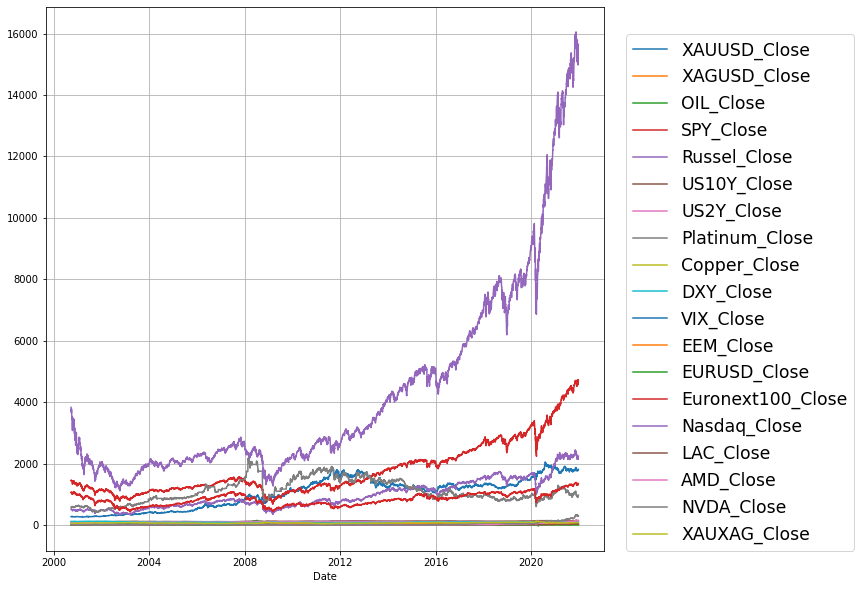

In [241]:
rcParams['figure.figsize'] = 10, 10
plt.plot(values['Date'],values.filter(like='_Close'))
plt.xlabel("Date")
plt.legend(values.filter(like='_Close').columns.to_list() ,loc=(1.04,0),fontsize='xx-large')
plt.grid()
plt.show()

## Normalize values <a class="anchor" id="normalize"></a>
[INDEX](#index)

Look For Adj Close is different from Normal Close

In [21]:
for i in ticker_detail.Name:
    if values[values[i+'_Close'] != values[i+'_Adj Close'] ].shape[0]>0:
        print(i,' -', values[values[i+'_Close'] != values[i+'_Adj Close'] ].shape)

EEM  - (5537, 111)
NVDA  - (5529, 111)


We will remove Volume, it does not need to normalize

In [22]:
# value_colums is a list for normalization and data transform
norm_colum=[]
value_colums = values.filter(like='XAUUSD').columns.str.replace('XAUUSD','').to_list()
value_colums.remove('_Volume')

for i in ticker_detail[ticker_detail['Normalize']=='Y'].Name:
    for c in value_colums:
        norm_colum.append(i+c)
not_norm_colum=[]
for i in ticker_detail[ticker_detail['Normalize']!='Y'].Name:
    for c in value_colums:
        not_norm_colum.append(i+c)

values_norm mean values normalized

In [23]:
values_norm = values[norm_colum]/values[norm_colum].iloc[0]

In [24]:
values_norm = values_norm.merge(values[['Date']],how='left',left_index=True, right_index=True)

In [25]:
values_denorm = values[not_norm_colum]
values_denorm = values_denorm.merge(values[['Date']],how='left',left_index=True, right_index=True)

In [245]:
values_norm.filter(like='_Close').tail(1).T

,5546
XAUUSD_Close,6.700703
XAGUSD_Close,4.706691
OIL_Close,2.173490
SPY_Close,3.261302
Russel_Close,4.357999
Platinum_Close,1.665413
Copper_Close,4.740141
Nasdaq_Close,4.088248
LAC_Close,11.861224
AMD_Close,6.105065


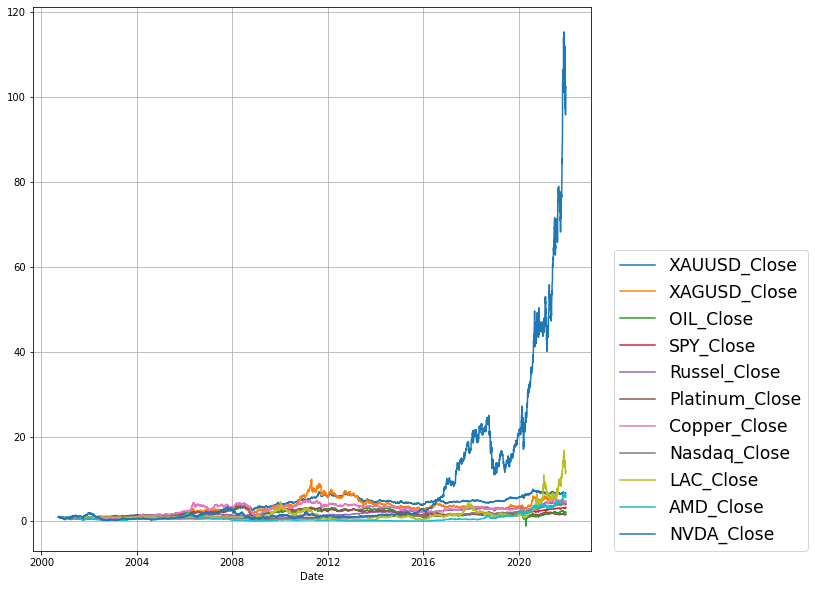

In [174]:
rcParams['figure.figsize'] = 10, 10
plt.plot(values_norm['Date'],values_norm.filter(like='_Close'))
plt.xlabel("Date")
plt.legend(values_norm.filter(like='_Close').columns.to_list() ,loc=(1.04,0),fontsize='xx-large')
plt.grid()
plt.show()

Stock holds great opportunities then emtias

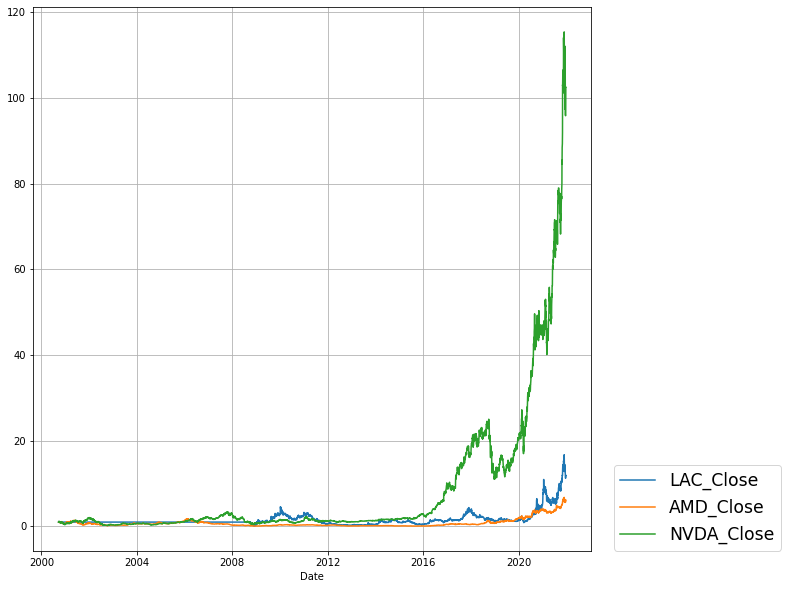

In [177]:
rcParams['figure.figsize'] = 10, 10
plt.plot(values_norm['Date'],values_norm[['LAC_Close','AMD_Close','NVDA_Close']])
plt.xlabel("Date")
plt.legend(values_norm[['LAC_Close','AMD_Close','NVDA_Close']].columns.to_list() ,loc=(1.04,0),fontsize='xx-large')
plt.grid()
plt.show()

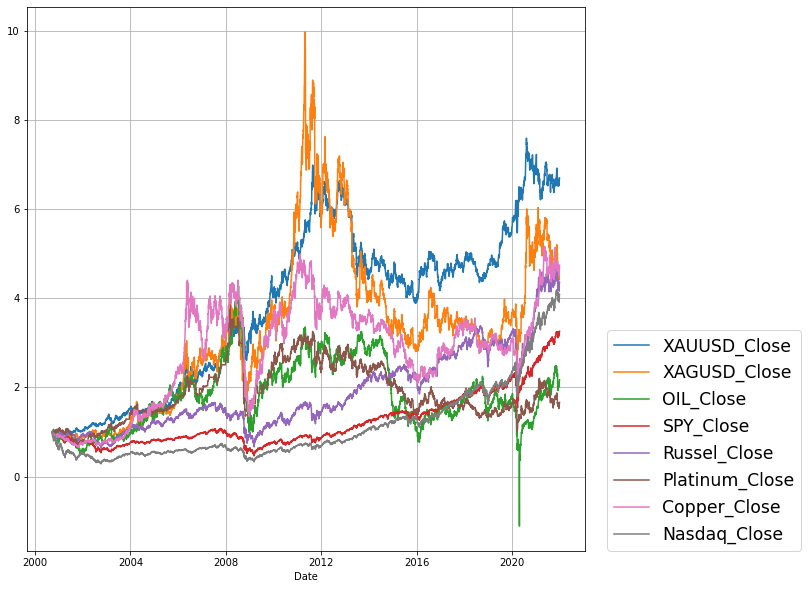

In [173]:
rcParams['figure.figsize'] = 10, 10
plt.plot(values_norm['Date'],values_norm[['XAUUSD_Close', 'XAGUSD_Close', 'OIL_Close', 'SPY_Close', 'Russel_Close', 'Platinum_Close', 'Copper_Close', 'Nasdaq_Close']])
plt.xlabel("Date")
plt.legend(values_norm.filter(like='_Close').columns.to_list() ,loc=(1.04,0),fontsize='xx-large')
plt.grid()
plt.show()

We can see that Silver has a big opportuniti

## Inflation Effect                 <a class="anchor" id="inflate"></a>
[INDEX](#index)

In [34]:
%%time
aif = Aif()
values_N_I =aif.calculate_Inflate(df=values_norm,norm_colum=norm_colum,date_col='Date',add_subs='Real_')

100%|█████████████████████████████████████████| 55/55 [00:23<00:00,  2.30it/s]

CPU times: user 23.7 s, sys: 149 ms, total: 23.8 s
Wall time: 23.9 s


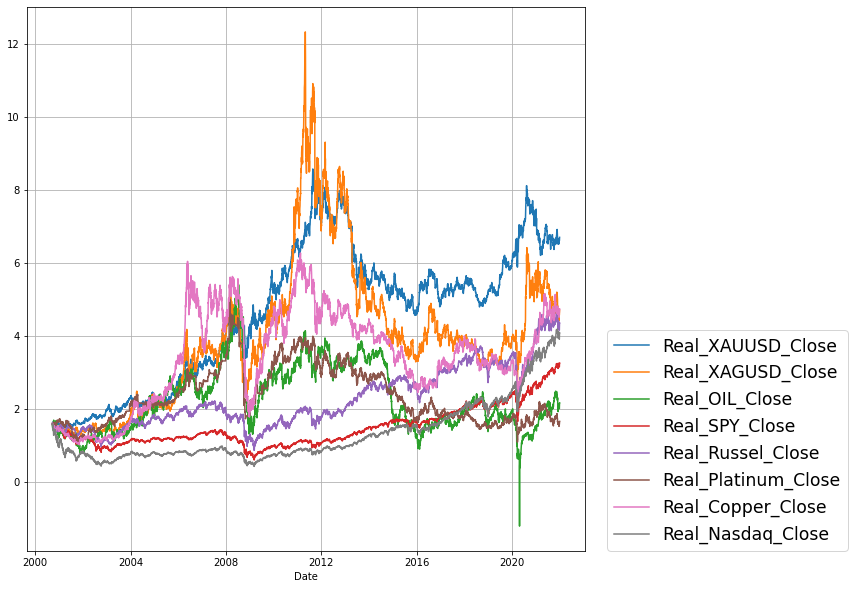

In [178]:
plt.plot(values_N_I['Date'],values_N_I[['Real_XAUUSD_Close', 'Real_XAGUSD_Close', 'Real_OIL_Close', 'Real_SPY_Close', 'Real_Russel_Close', 'Real_Platinum_Close', 'Real_Copper_Close', 'Real_Nasdaq_Close']])
plt.xlabel("Date")
plt.legend(values_N_I.filter(like='_Close').columns.to_list() ,loc=(1.04,0),fontsize='xx-large')
plt.grid()
plt.show()

You must buy some emtia to prevent currency depreciation. There is Inflation on money.

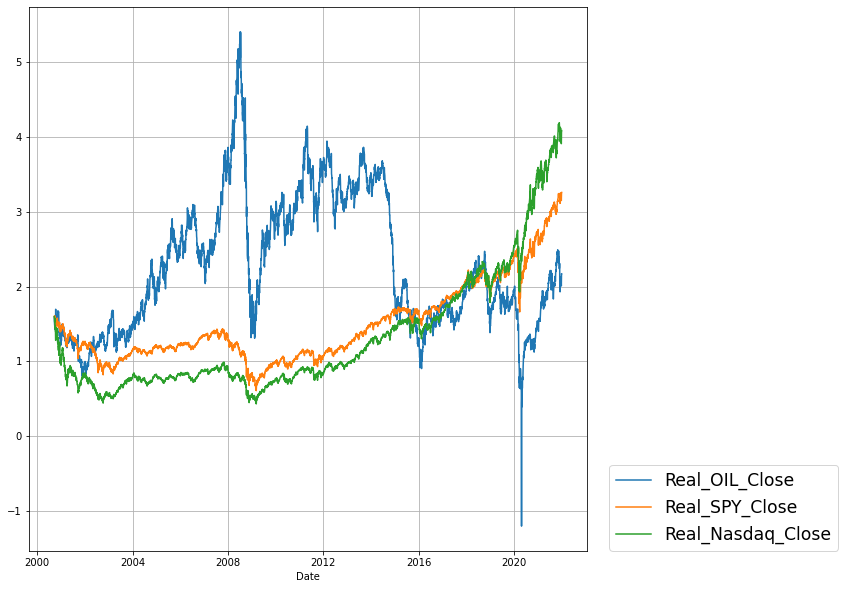

In [179]:
columns_show = ['Real_OIL_Close','Real_SPY_Close', 'Real_Nasdaq_Close']

#valuesN_I.filter(like='_Close').plot()
plt.plot(values_N_I['Date'],values_N_I[columns_show])
plt.xlabel("Date")
plt.legend(values_N_I[columns_show].columns.to_list() ,loc=(1.04,0),fontsize='xx-large')
plt.grid()
plt.show()

Oil has big price movements

## Mooving Avarage               <a class="anchor" id="mooving"></a>
[INDEX](#index)

In [40]:
features_will_predict=['XAUUSD_Close','XAGUSD_Close','LAC_Close','AMD_Close','NVDA_Close']

In [42]:
aif = Aif()
values_av_sma = aif.movingavg_avg(df=values,avg_columns=values.filter(like='_Close').drop(columns=['XAUUSD_Close','XAGUSD_Close']).columns.to_list(),
                  period=[5,50,200],date_col='Date',type_avg='SMA')
values_av_ema = aif.movingavg_avg(df=values,avg_columns=values.filter(like='_Close').drop(columns=['XAUUSD_Close','XAGUSD_Close']).columns.to_list(),
                  period=[50,100,200],date_col='Date',type_avg='EMA')

100%|████████████████████████████████████████| 17/17 [00:00<00:00, 244.26it/s]


In [43]:
aif = Aif()
values_av_sma_agau = aif.movingavg_avg(df=values,avg_columns=[],
                  period=[15,20,60,90,100,180,200,250],date_col='Date',type_avg='SMA')
values_av_ema_agau = aif.movingavg_avg(df=values,avg_columns=['XAUUSD_Close','XAGUSD_Close'],
                  period=[90,180],date_col='Date',type_avg='EMA')

  0%|                                                 | 0/110 [00:00<?, ?it/s]/Users/batuhankose/dev/python/envs/P37/codes/portfolio/AIF.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_ma[c+'_'+str(i)+type_avg] = (data[c]/(data[c].rolling(window=i).mean()))-1
100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 358.81it/s]


In [44]:
aif = Aif()
values_av_sma_r = aif.movingavg_avg_real(df=values,avg_columns=values.filter(like='_Close').drop(columns=['XAUUSD_Close','XAGUSD_Close']).columns.to_list(),
                  period=[5,50,200],date_col='Date',type_avg='SMA')
values_av_ema_r = aif.movingavg_avg_real(df=values,avg_columns=values.filter(like='_Close').drop(columns=['XAUUSD_Close','XAGUSD_Close']).columns.to_list(),
                  period=[50,100,200],date_col='Date',type_avg='EMA')

100%|████████████████████████████████████████| 17/17 [00:00<00:00, 439.58it/s]


In [45]:
aif = Aif()

values_av_sma_agau_r = aif.movingavg_avg_real(df=values,avg_columns=features_will_predict,
                  period=[5,15,20,30,50,60,90,100,180,200,250],date_col='Date',type_avg='SMA')
values_av_ema_agau_r = aif.movingavg_avg_real(df=values,avg_columns=['XAUUSD_Close','XAGUSD_Close'],
                  period=[50,90,100,180,200],date_col='Date',type_avg='EMA')

100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 217.77it/s]


## Kaufman (KAMA)               <a class="anchor" id="kaufman"></a>
[INDEX](#index) 

In [46]:
aif = Aif()
values_kama = aif.kama(df=values,value_columns=values.filter(like='_Close').columns.to_list(),date_col='Date',add_subs='Kama',window=21)
values_kama.shape

100%|█████████████████████████████████████████| 19/19 [00:00<00:00, 43.37it/s]


(5527, 20)

# Some of the Kama columns are mostly null. 
If one column has %90 null value, we will remove this column

In [47]:
df_columns=values_kama.isna().sum().to_frame()
drop_columns = df_columns[df_columns[0]>(values.shape[0]*0.9)].index.to_list()
print('This columns must deleted',drop_columns)
values_kama.drop(columns=drop_columns,inplace= True)
values_kama.shape

This columns must deleted ['Platinum_Close_Kama', 'EEM_Close_Kama', 'EURUSD_Close_Kama', 'LAC_Close_Kama']


(5527, 16)

## RSI               <a class="anchor" id="rsi"></a>
[INDEX](#index)

In [48]:
aif = Aif()
values_rsi =aif.rsi(df=values,value_columns=values.filter(like='_Close').columns.to_list(),
                    date_col='Date',add_subs='RSI')

change_days = [1,3,5,14,17,21]
print(values_rsi.shape)
for col in tqdm(values_rsi.drop(columns=['Date']).columns.to_list()):
    for i in change_days:
        values_rsi = values_rsi.merge(pd.DataFrame(values_rsi[col].pct_change(periods=i)).add_suffix("-T-"+str(i)),left_index=True, right_index=True)
print(values_rsi.shape)
values_rsi

100%|████████████████████████████████████████| 19/19 [00:00<00:00, 294.62it/s]


(5534, 20)


100%|█████████████████████████████████████████| 19/19 [00:00<00:00, 34.49it/s]

(5534, 134)


,Date,XAUUSD_Close_RSI,XAGUSD_Close_RSI,OIL_Close_RSI,SPY_Close_RSI,Russel_Close_RSI,US10Y_Close_RSI,US2Y_Close_RSI,Platinum_Close_RSI,Copper_Close_RSI,...,NVDA_Close_RSI-T-5,NVDA_Close_RSI-T-14,NVDA_Close_RSI-T-17,NVDA_Close_RSI-T-21,XAUXAG_Close_RSI-T-1,XAUXAG_Close_RSI-T-3,XAUXAG_Close_RSI-T-5,XAUXAG_Close_RSI-T-14,XAUXAG_Close_RSI-T-17,XAUXAG_Close_RSI-T-21
13,2000-10-10,53.517495,57.426578,55.373518,24.890110,23.582649,65.311986,69.900809,64.254313,41.616749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2000-10-11,46.475501,44.345206,55.373518,20.056283,20.698446,65.992359,76.611597,64.823332,39.179857,...,NaN,NaN,NaN,NaN,0.088697,NaN,NaN,NaN,NaN,NaN
15,2000-10-12,62.831026,56.207231,70.875830,15.141616,16.896753,73.527093,85.677881,62.261657,30.149047,...,NaN,NaN,NaN,NaN,0.233605,NaN,NaN,NaN,NaN,NaN
16,2000-10-13,51.370193,47.908081,62.547366,36.507940,35.715903,69.245760,87.073463,61.176858,38.220312,...,NaN,NaN,NaN,NaN,-0.138352,0.157212,NaN,NaN,NaN,NaN
17,2000-10-16,49.195818,47.530217,50.644987,36.681971,36.916964,66.848724,70.741572,45.731422,39.720501,...,NaN,NaN,NaN,NaN,-0.062786,-0.003804,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,2021-12-20,50.739136,42.932372,38.087572,43.863074,37.738235,57.785702,49.181665,41.006233,47.335104,...,0.004225,-0.343450,-0.403226,-0.449915,0.027660,-0.154088,-0.067476,-0.073600,0.077112,0.259076
5543,2021-12-21,48.851549,46.155127,46.257987,51.103826,46.473750,49.992918,45.217438,41.431585,51.333710,...,0.112375,-0.171189,-0.239278,-0.314198,-0.107481,-0.073898,-0.204138,-0.256873,-0.150412,0.190927
5544,2021-12-22,53.273448,50.036980,50.268743,54.765795,48.797864,44.819035,46.043957,52.862478,55.114002,...,-0.044466,-0.185059,-0.287926,-0.281738,-0.042453,-0.121733,-0.277060,-0.216745,-0.234951,-0.100432
5545,2021-12-23,56.135177,51.829559,52.658387,56.912004,51.169184,42.965372,43.455106,54.397032,54.891095,...,0.125812,-0.057964,-0.225883,-0.296363,-0.006703,-0.151100,-0.119159,-0.237586,-0.213579,-0.085640


## Intersection              <a class="anchor" id="intersection"></a>
[INDEX](#index)


In [49]:
%%time
accumulator=0
accumulator = pd.DataFrame()
aif=Aif()
values_temp = values_av_sma_r.merge(values.filter(like='_Close'),how='left',left_index=True, right_index=True).copy()
for i in tqdm(range(0,ticker_detail.shape[0])):    
    symbol=ticker_detail.iloc[i]['Ticker']
    column_name=ticker_detail.iloc[i]['Name']
    temp = values_temp.filter(like=column_name)
    values_inter = aif.intersectionN(df=temp)
    accumulator=pd.merge(values_inter, accumulator, how="outer",left_index=True, right_index=True)    
accumulator.shape

100%|████████████████████████████████████████| 18/18 [00:00<00:00, 103.92it/s]

CPU times: user 162 ms, sys: 25.5 ms, total: 188 ms
Wall time: 187 ms


(5348, 96)

In [52]:

values_temp = values_av_sma_agau_r.merge(values[['XAUUSD_Close','XAGUSD_Close','LAC_Close','AMD_Close','NVDA_Close']],how='left',left_index=True, right_index=True).copy()
for i in tqdm(range(0,2)):    
    symbol=ticker_detail.iloc[i]['Ticker']
    column_name=ticker_detail.iloc[i]['Name']
    temp = values_temp.filter(like=column_name)
    values_inter = aif.intersectionN(df=temp)
    accumulator=pd.merge(values_inter, accumulator, how="outer",left_index=True, right_index=True)    
accumulator.shape

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 10.83it/s]

CPU times: user 174 ms, sys: 23.3 ms, total: 198 ms
Wall time: 197 ms


(5348, 228)

In [53]:

values_temp = values_av_ema_r.merge(values.filter(like='_Close'),how='left',left_index=True, right_index=True).copy()
for i in tqdm(range(0,ticker_detail.shape[0])):    
    symbol=ticker_detail.iloc[i]['Ticker']
    column_name=ticker_detail.iloc[i]['Name']
    temp = values_temp.filter(like=column_name)
    values_inter = aif.intersectionN(df=temp)
    accumulator=pd.merge(values_inter, accumulator, how="outer",left_index=True, right_index=True)    
accumulator.shape

100%|█████████████████████████████████████████| 18/18 [00:00<00:00, 39.39it/s]

CPU times: user 341 ms, sys: 129 ms, total: 470 ms
Wall time: 470 ms


(5547, 324)

In [54]:

values_temp = values_av_ema_agau_r.merge(values[['XAUUSD_Close','XAGUSD_Close','LAC_Close','AMD_Close','NVDA_Close']],how='left',left_index=True, right_index=True).copy()
for i in tqdm(range(0,2)):    
    symbol=ticker_detail.iloc[i]['Ticker']
    column_name=ticker_detail.iloc[i]['Name']
    temp = values_temp.filter(like=column_name)
    values_inter = aif.intersectionN(df=temp)
    accumulator=pd.merge(values_inter, accumulator, how="outer",left_index=True, right_index=True)    
accumulator.shape

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 29.28it/s]

CPU times: user 58 ms, sys: 21.6 ms, total: 79.6 ms
Wall time: 75.7 ms


(5547, 354)

In [55]:

values_temp = values_kama.merge(values.filter(like='_Close'),how='left',left_index=True, right_index=True).copy()
for i in tqdm(range(0,ticker_detail.shape[0])):    
    symbol=ticker_detail.iloc[i]['Ticker']
    column_name=ticker_detail.iloc[i]['Name']
    temp = values_temp.filter(like=column_name)
    values_inter = aif.intersectionN(df=temp)
    accumulator=pd.merge(values_inter, accumulator, how="outer",left_index=True, right_index=True)    
accumulator.shape

100%|█████████████████████████████████████████| 18/18 [00:01<00:00, 15.39it/s]

CPU times: user 1 s, sys: 181 ms, total: 1.18 s
Wall time: 1.18 s


(5547, 368)

In [56]:

values_temp = values_kama.merge(values.filter(like='_Close'),how='left',left_index=True, right_index=True).copy()
for i in tqdm(range(0,ticker_detail.shape[0])):    
    symbol=ticker_detail.iloc[i]['Ticker']
    column_name=ticker_detail.iloc[i]['Name']
    temp = values_temp.filter(like=column_name)
    values_inter = aif.intersection(df=temp)
    accumulator=pd.merge(values_inter, accumulator, how="outer",left_index=True, right_index=True)    
accumulator.shape

100%|█████████████████████████████████████████| 18/18 [00:24<00:00,  1.35s/it]

CPU times: user 23.6 s, sys: 472 ms, total: 24.1 s
Wall time: 24.3 s


(5547, 396)

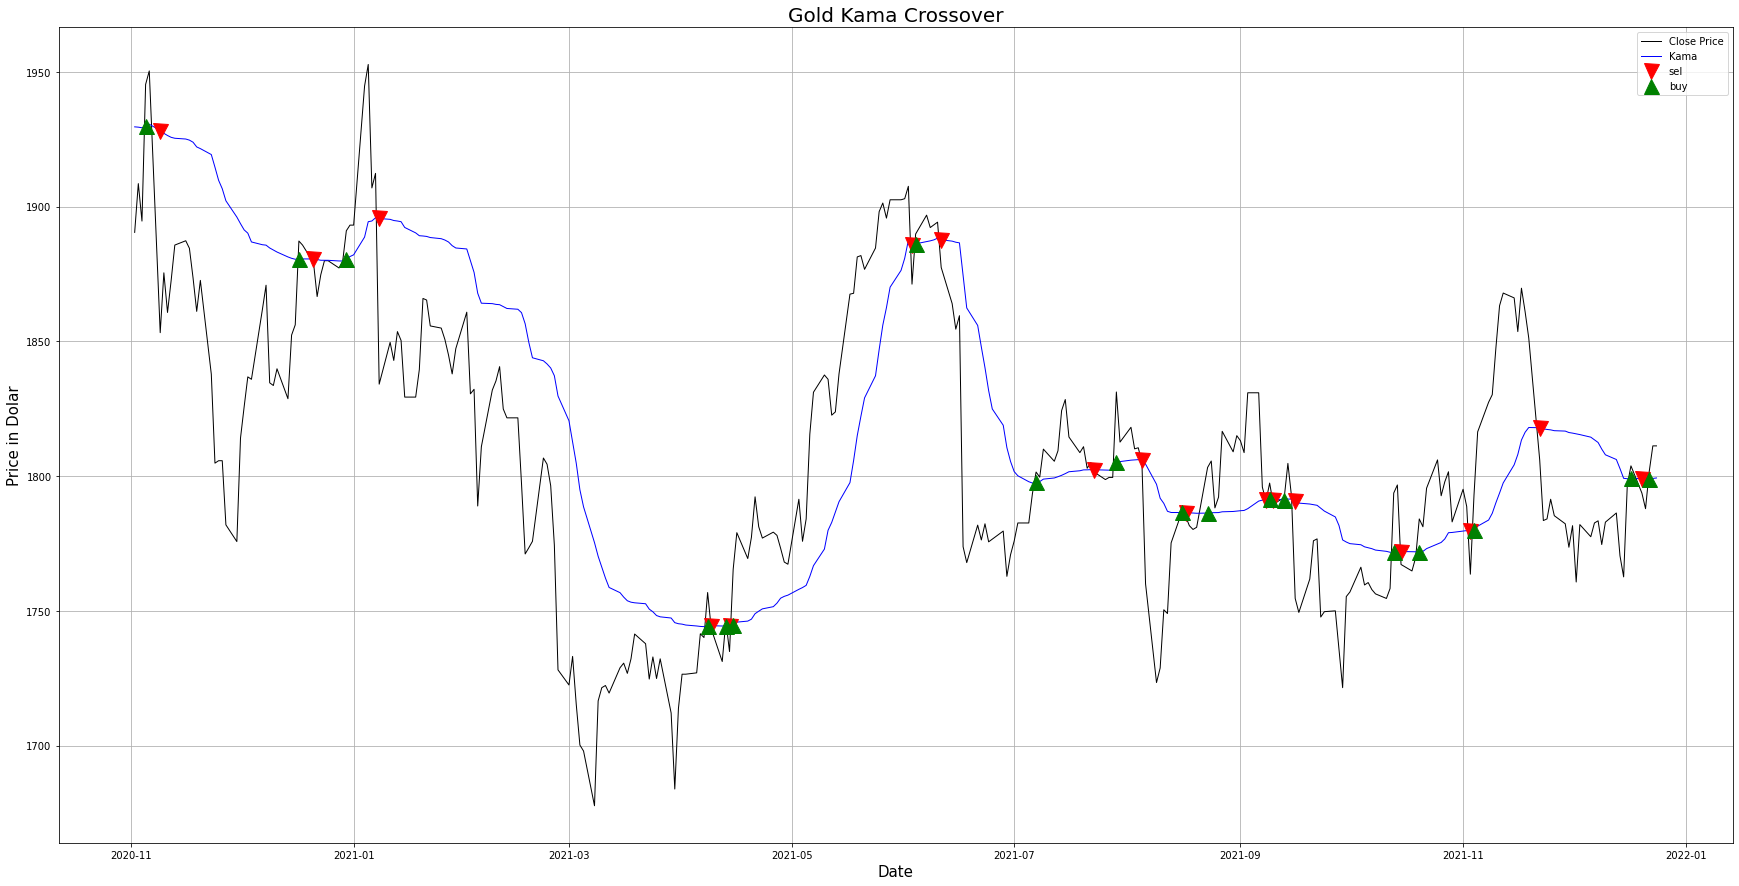

In [97]:
df_for_graf=pd.merge(values_kama.filter(like='XAUUSD_Close'), values[['Date','XAUUSD_Close']], how="outer",left_index=True, right_index=True)
df_for_graf=pd.merge(df_for_graf, accumulator.filter(like='XAUUSD_Close').filter(like='Kama').filter(like='_P_'), how="outer",left_index=True, right_index=True)

plt.figure(figsize = (30,15))
temp=df_for_graf.tail(300)

plt.plot(temp['Date'],temp['XAUUSD_Close'],color = 'k', lw = 1, label = 'Close Price')  
plt.plot(temp['Date'],temp['XAUUSD_Close_Kama'],color = 'b', lw = 1, label = 'Kama')  

plt.plot(temp[temp['XAUUSD_Close_Kama_XAUUSD_Close_P_I'] == 1].Date, 
         temp['XAUUSD_Close_Kama'][temp['XAUUSD_Close_Kama_XAUUSD_Close_P_I'] == 1], 
         'v', markersize = 15, color = 'r', label = 'sel')
plt.plot(temp[temp['XAUUSD_Close_Kama_XAUUSD_Close_P_I'] == -1].Date, 
         temp['XAUUSD_Close_Kama'][temp['XAUUSD_Close_Kama_XAUUSD_Close_P_I'] == -1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.ylabel('Price in Dolar', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Gold Kama Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

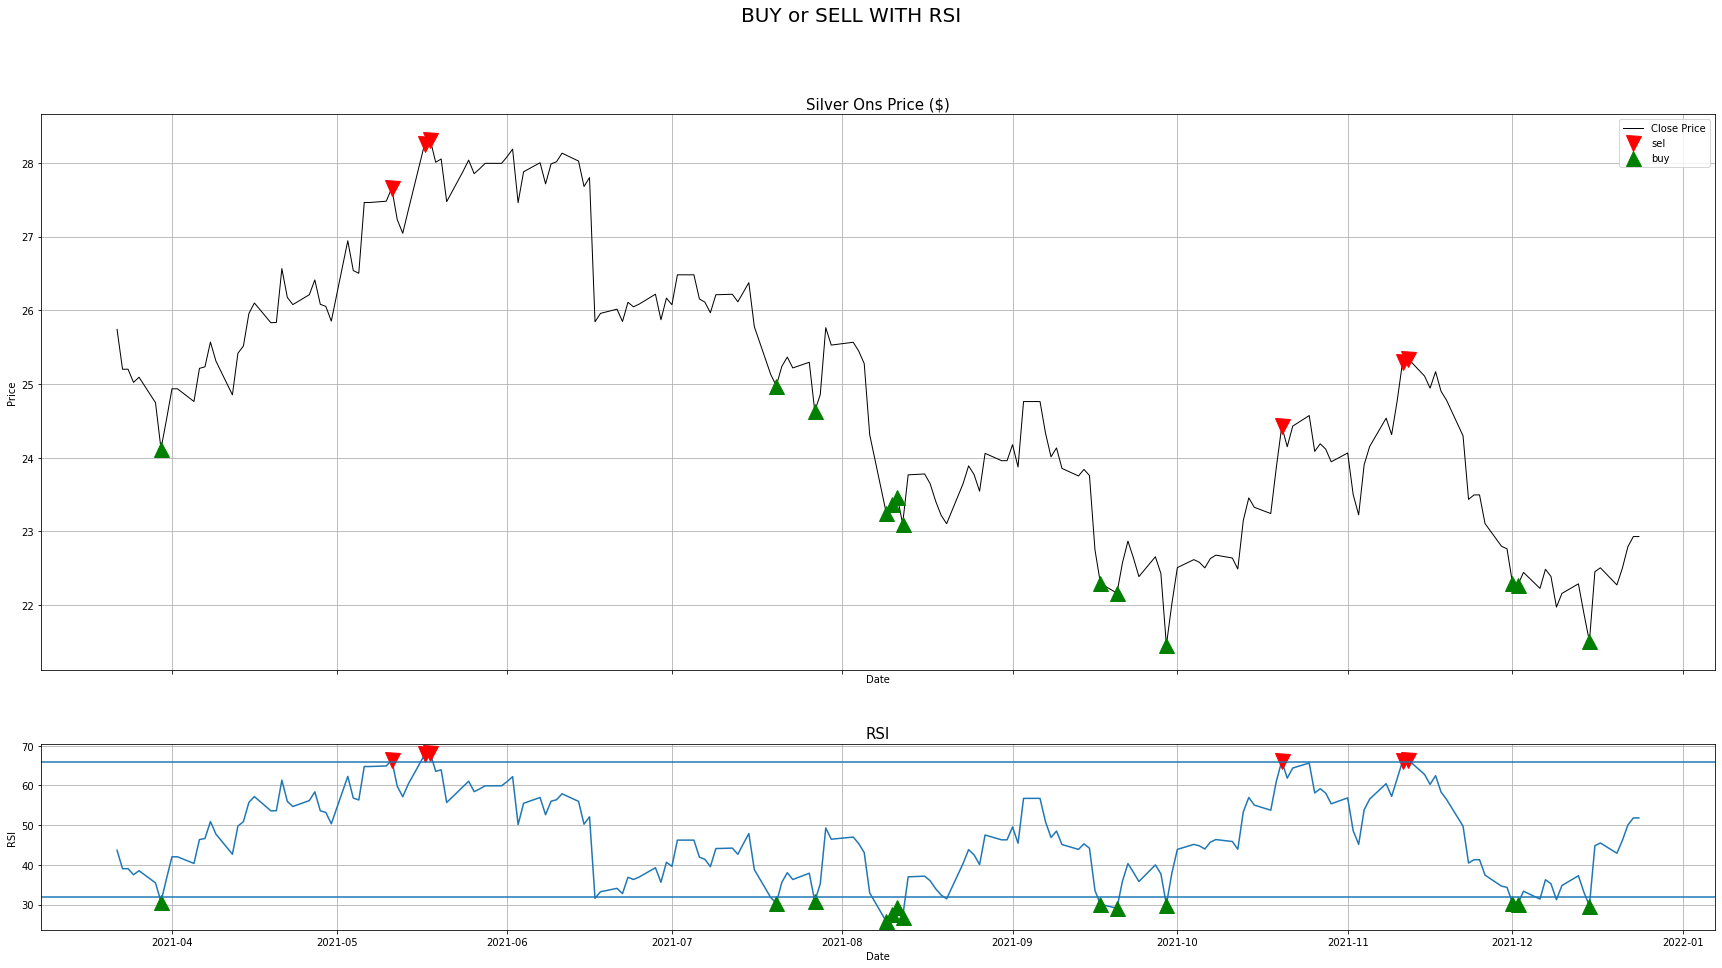

In [180]:

fig,axs = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":[3,1]},figsize=(30,15))

[ax1,ax2]=axs[0],axs[1]

ax1.plot(temp['Date_x'],temp['XAGUSD_Close'],color = 'k', lw = 1, label = 'Close Price')

ax1.plot(temp[temp['XAGUSD_Close_RSI'] > 66].Date_x, 
         temp[temp['XAGUSD_Close_RSI'] > 66 ].XAGUSD_Close, 
         'v', markersize = 15, color = 'r', label = 'sel')

ax1.plot(temp[temp['XAGUSD_Close_RSI'] < 31 ].Date_x, 
         temp[temp['XAGUSD_Close_RSI'] < 31 ].XAGUSD_Close, 
         '^', markersize = 15, color = 'g', label = 'buy')

ax1.set_title('Silver Ons Price ($)',fontsize = 15 )
ax2.set_title('RSI',fontsize = 15 )

ax1.legend()
ax1.grid()
ax2.grid()

plt.setp(ax1, xlabel='Date')
plt.setp(ax2, xlabel='Date')

plt.setp(ax1, ylabel='Price')
plt.setp(ax2, ylabel='RSI')

fig.suptitle('BUY or SELL WITH RSI', fontsize = 20)

ax2.plot(temp['Date_x'],temp['XAGUSD_Close_RSI'])

ax2.plot(temp[temp['XAGUSD_Close_RSI'] > 66].Date_x, 
         temp[temp['XAGUSD_Close_RSI'] > 66 ].XAGUSD_Close_RSI, 
         'v', markersize = 15, color = 'r', label = 'sel')

ax2.plot(temp[temp['XAGUSD_Close_RSI'] < 31 ].Date_x, 
         temp[temp['XAGUSD_Close_RSI'] < 31 ].XAGUSD_Close_RSI, 
         '^', markersize = 15, color = 'g', label = 'buy')

ax2.axhline(y=32)
ax2.axhline(y=66)

plt.show()


## Historical Returns               <a class="anchor" id="returns"></a>
[INDEX](#index)

In [225]:
imp    = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF']
imp_new= (ticker_detail[ticker_detail['Description'].isin(imp)].Name+"_Close").tolist()
cols=values.filter(like='_Close', axis=1).columns
# Calculating Short term -Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=values['Date'])
for i in change_days:
    x= values[cols].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)

# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
    x= values[imp_new].filter(like='_Close', axis=1).pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)

In [226]:
data = pd.merge(data, accumulator, how="outer",left_index=True, right_index=True)    
data = pd.merge(data, values_av_sma, how="outer",left_index=True, right_index=True)    

data = pd.merge(data, values_av_ema, how="outer",left_index=True, right_index=True)    

data = pd.merge(data, values_rsi, how="outer",left_index=True, right_index=True)    

data = pd.merge(data, values.filter(like='Adj'), how="inner",left_index=True, right_index=True) 

data = pd.merge(data, values.filter(like='_Close'), how="inner",left_index=True, right_index=True) 

data = data.drop(data.filter(like='Date').columns.to_list(),axis=1)

data = pd.merge(data, values.filter(like='Date'), how="inner",left_index=True, right_index=True) 

data = data.dropna(axis=0)

In [186]:
output = open('data.pkl', 'wb')

pickle.dump(data, output)

output.close()

In [63]:
read_file = open('data.pkl', 'rb')

data = pickle.load(read_file)

read_file.close()

# Use Genetic Algorithm               <a class="anchor" id="useG"></a>
[INDEX](#index)
    

In [238]:
from AIF import trade,show_buy_sell

In [203]:
read_file = open('buy_sel_param.pkl', 'rb')

agents_f = pickle.load(read_file)

read_file.close()

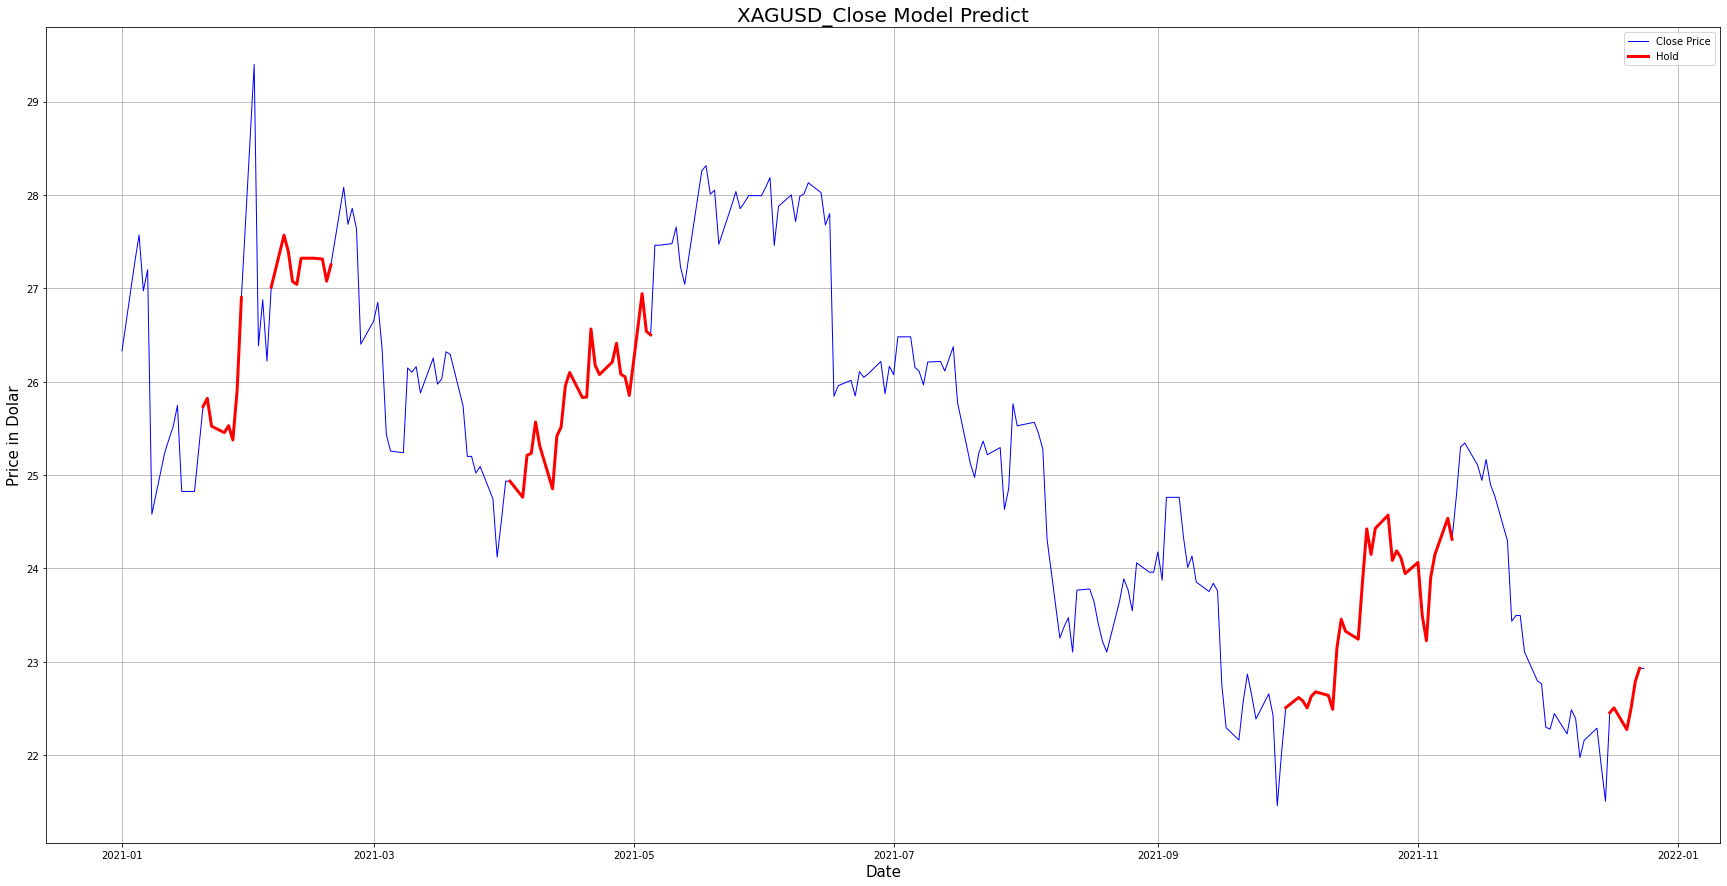

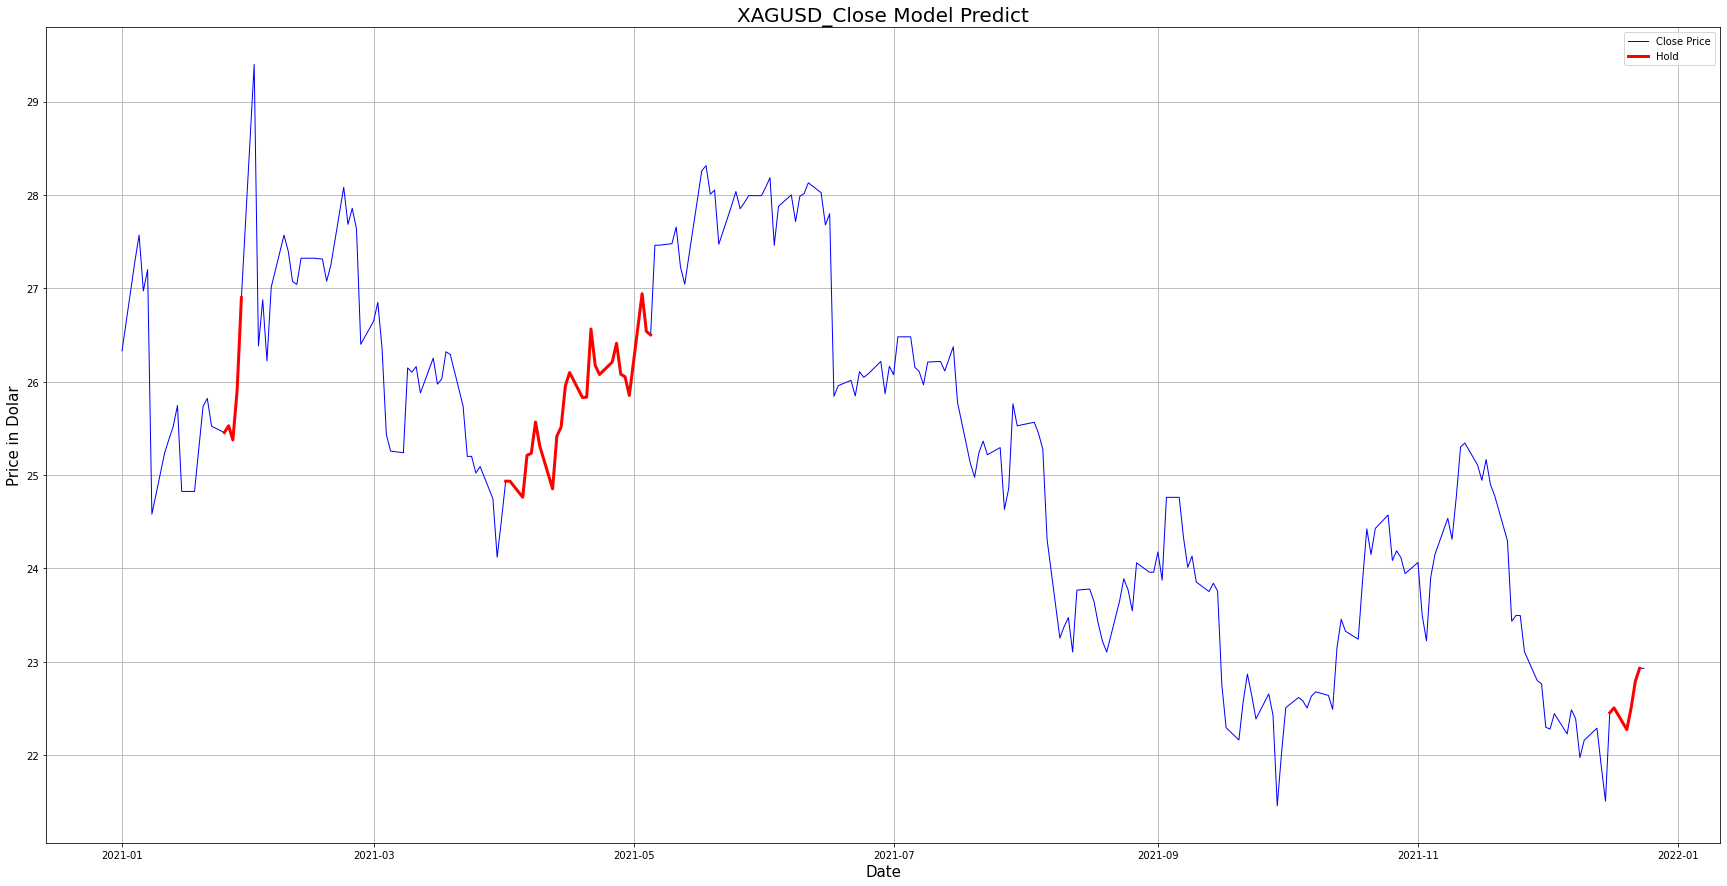

In [239]:
agent={}


for key in (agents_f.keys()):        
    agent[key]=agents_f[key].iloc[33]
value,kalici=trade(data[data['Date'].dt.year>int(2020)],detay=True,**agent)
show_buy_sell(data[data['Date'].dt.year>int(2020)],col_val='XAGUSD_Close',col_date='Date',kalici=kalici)    


for key in (agents_f.keys()):        
    agent[key]=agents_f[key].iloc[20]
value,kalici=trade(data[data['Date'].dt.year>int(2020)],detay=True,**agent)
show_buy_sell(data[data['Date'].dt.year>int(2020)],col_val='XAGUSD_Close',col_date='Date',kalici=kalici)    
